# ***ICPC世界总决赛数据挖掘***
### Author：LiuBaiWan
From: https://github.com/LiuBaiWan-Runner  
Reference to：https://www.kaggle.com/code/amralbaz/icpc-eda-predection

### 1 Introduction
#### 1.1 Abstract
数据是Kaggle 上提供的 ICPC 世界总决赛排名数据集，提供了自 1999 年以来参加国际大学生程序设计竞赛 (ICPC) 世界总决赛的来自世界各地不同大学的团队的表现信息。
#### 1.2 Problems
> 1. 哪个国家举办的比赛次数最多？
> 1. 哪所大学获得金奖最多？
> 1. 哪个国家获得金奖最多？
> 1. 哪个大学参加的次数最多？
> 1. 哪支队伍参加的次数最多？
> 1. 参赛队伍的数量是否与主办国或比赛举办时间有关？
> 1. 问题总数与得分之间是否存在关系?
> 1. 预测下一次的金奖花落谁家?

### 2 Preprocessing
#### 2.1 Imports

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

#### 2.2 Set colors

In [2]:
colors = sns.color_palette("flare")
plt.style.available
plt.style.use('ggplot')

#### 2.3 Read data and display

In [3]:
# Read data
df = pd.read_csv("icpc-full.csv")
df

,Year,Date,Host,City,Venue,Rank,University,Country,Team,Contestant 1,...,Contestant 3,Gold,Silver,Bronze,Honorable,Score,Total,Score Percentage,Penalty,Prize
0,1999,1999-04-11,Netherlands,Eindhoven,Eindhoven University of Technology,1.0,University of Waterloo,Canada,U Waterloo,David Kennedy,...,Viet-Trung Luu,True,False,False,False,6.0,8,0.75,948.0,World Champion
1,1999,1999-04-11,Netherlands,Eindhoven,Eindhoven University of Technology,2.0,Albert-Ludwigs-Universität Freiburg,Germany,Freiburg B Team,NaN,...,NaN,False,True,False,False,6.0,8,0.75,992.0,NaN
2,1999,1999-04-11,Netherlands,Eindhoven,Eindhoven University of Technology,3.0,St. Petersburg Institute of Fine Mechanics & O...,Russia,St. Petersburg IFMO,Alexander Volkov,...,Vladimir Lyovkin,False,False,True,False,6.0,8,0.75,1046.0,NaN
3,1999,1999-04-11,Netherlands,Eindhoven,Eindhoven University of Technology,4.0,University of Bucharest,Romania,UNIBUC Bucharest,NaN,...,NaN,False,False,True,False,6.0,8,0.75,1048.0,NaN
4,1999,1999-04-11,Netherlands,Eindhoven,Eindhoven University of Technology,5.0,Duke University,United States,Duke Blue Devils,NaN,...,NaN,False,False,True,False,6.0,8,0.75,1337.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2303,2021,2022-11-10,Bangladesh,Dhaka,International Convention City Bashundhara,126.0,German University in Cairo,Egypt,Treevial,Abdelrahman Selim,...,Omar Tarek,False,False,False,True,0.0,12,0.00,0.0,NaN
2304,2021,2022-11-10,Bangladesh,Dhaka,International Convention City Bashundhara,126.0,Syrian Virtual University,Syria,Traitors,Mhd Adel SaadEddin,...,Zaher SaadEddin,False,False,False,True,0.0,12,0.00,0.0,NaN
2305,2021,2022-11-10,Bangladesh,Dhaka,International Convention City Bashundhara,126.0,Universidad Tecnologica de Pereira,Colombia,UTP - Lucas,Jhon Alex Gaviria Tobón,...,Yeferson Gaitan Gomez,False,False,False,True,0.0,12,0.00,0.0,NaN
2306,2021,2022-11-10,Bangladesh,Dhaka,International Convention City Bashundhara,126.0,Universidad de Costa Rica,Costa Rica,Chayotes UCR,César Herrera Garro,...,Kevin Rojas,False,False,False,True,0.0,12,0.00,0.0,NaN


### 3 Data understand and analysis

In [4]:
# Index
print(df.columns)

Index(['Year', 'Date', 'Host', 'City', 'Venue', 'Rank', 'University',
       'Country', 'Team', 'Contestant 1', 'Contestant 2', 'Contestant 3',
       'Gold', 'Silver', 'Bronze', 'Honorable', 'Score', 'Total',
       'Score Percentage', 'Penalty', 'Prize'],
      dtype='object')


In [5]:
# descriptive info
df.describe().round(3)

,Year,Rank,Score,Total,Score Percentage,Penalty
count,2308.000,2265.000,2275.000,2308.000,2275.000,2190.000
mean,2011.682,53.217,3.876,11.133,0.349,655.083
std,6.320,33.888,2.226,1.608,0.195,391.896
min,1999.000,1.000,0.000,8.000,0.000,0.000
25%,2007.000,25.000,2.000,10.000,0.200,365.250
50%,2012.000,49.000,4.000,11.000,0.330,638.000
75%,2017.000,78.000,5.000,12.000,0.500,934.500
max,2021.000,139.000,13.000,15.000,1.000,1912.000


In [6]:
# null values
df.isna().sum()

Year                   0
Date                   0
Host                   0
City                   0
Venue                  0
Rank                  43
University             0
Country                0
Team                   2
Contestant 1         400
Contestant 2         400
Contestant 3         401
Gold                   0
Silver                 0
Bronze                 0
Honorable              0
Score                 33
Total                  0
Score Percentage      33
Penalty              118
Prize               2168
dtype: int64

### 4 Problems solving and data visualization
#### 4.1 Which country hosted the most competition?

In [7]:
host_countries = df[df.Rank == 1] .iloc[:,[0,2]].values
country_year_map = dict()
for year, country in host_countries:
    if country in country_year_map:
        country_year_map[country] += 1
    else:
        country_year_map[country] = 1

<Axes: title={'center': 'The host country of each year'}, xlabel='Year', ylabel='Country'>

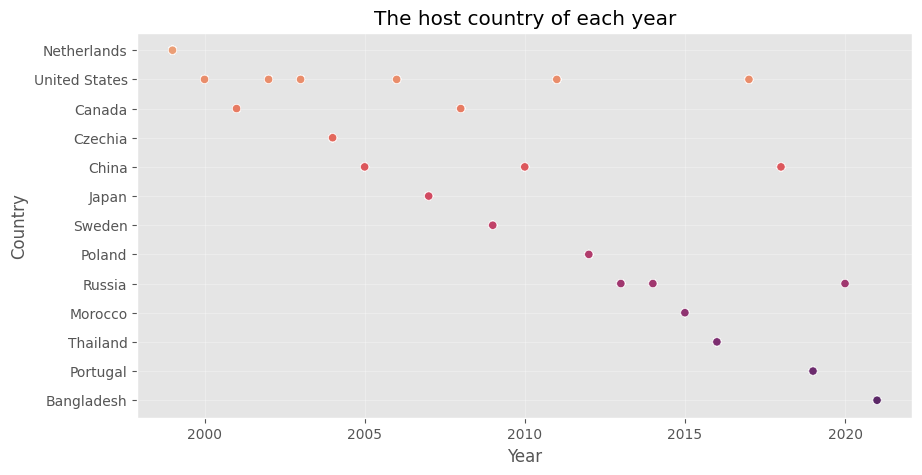

In [8]:
plt.figure(figsize=(10,5))
plt.title('The host country of each year')
plt.xlabel('Year')
plt.ylabel('Country')
plt.grid(alpha=0.3)
sns.scatterplot(data=df, x='Year', y='Host', hue=df.Host, legend=False, palette='flare')

<Axes: title={'center': 'Frequency of games held by thoes countries'}, xlabel='Country', ylabel='Count'>

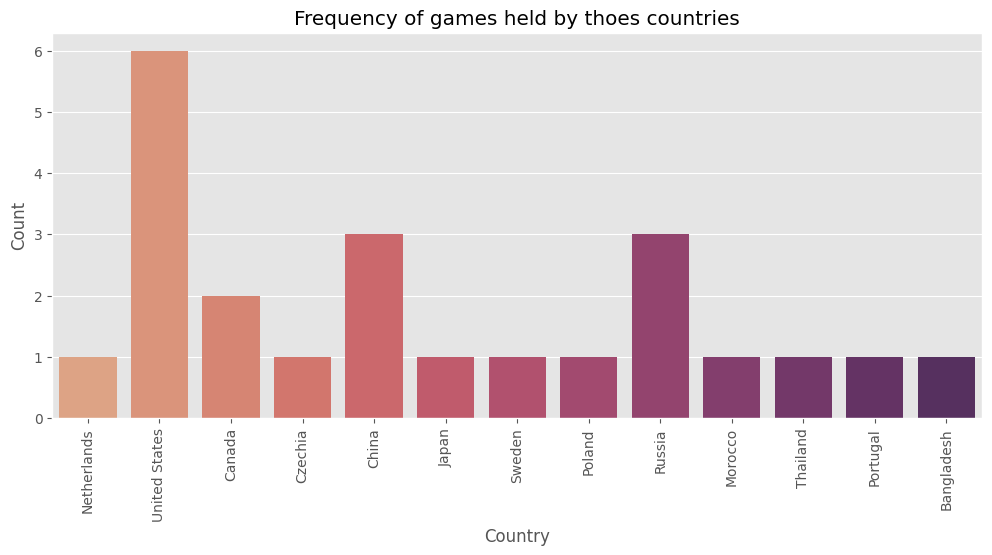

In [9]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.tick_params(axis='x', rotation=90)
plt.title('Frequency of games held by thoes countries')
plt.xlabel('Country')
plt.ylabel('Count')
sns.barplot(x=list(country_year_map.keys()), y=list(country_year_map.values()), palette='flare')

*From this, we can conclude that the United States is the country hosting the most competitions with `6` times.*
***

#### 4.2 Which university has won the most gold awards?

<Axes: title={'center': 'Frequency of gold awards won by each university'}, xlabel='Count', ylabel='University'>

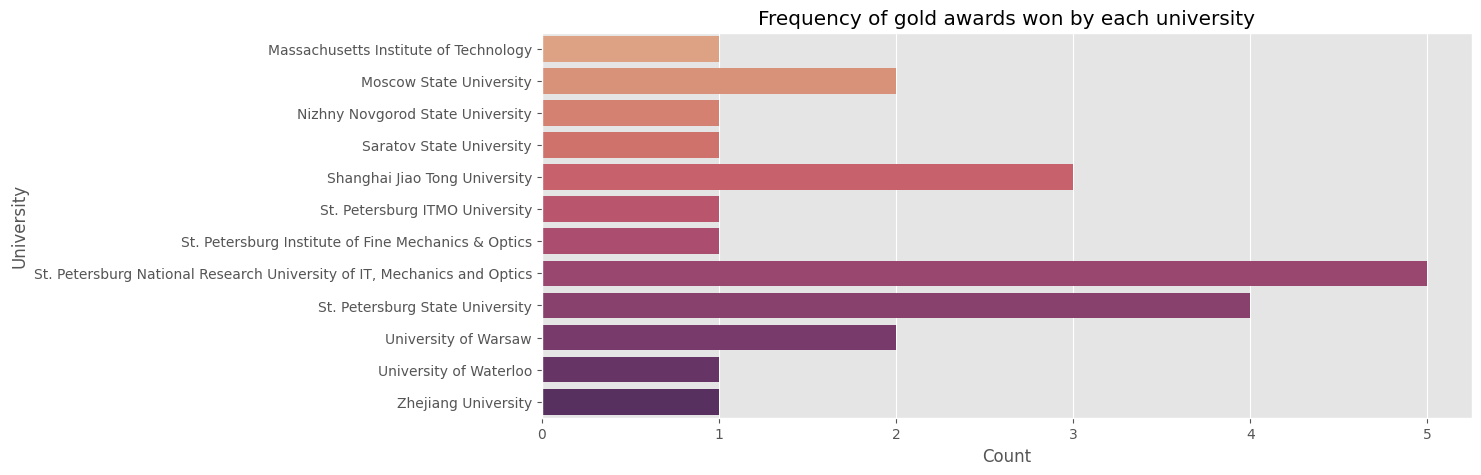

In [10]:
world_champs = df[df.Rank == 1]
univ_champs = world_champs.groupby('University').size().to_dict()

plt.figure(figsize=(12,5))
plt.title('Frequency of gold awards won by each university')
plt.ylabel('University')
plt.xlabel('Count')
sns.barplot(y=list(univ_champs.keys()), x=list(univ_champs.values()),orient='h', palette='flare')

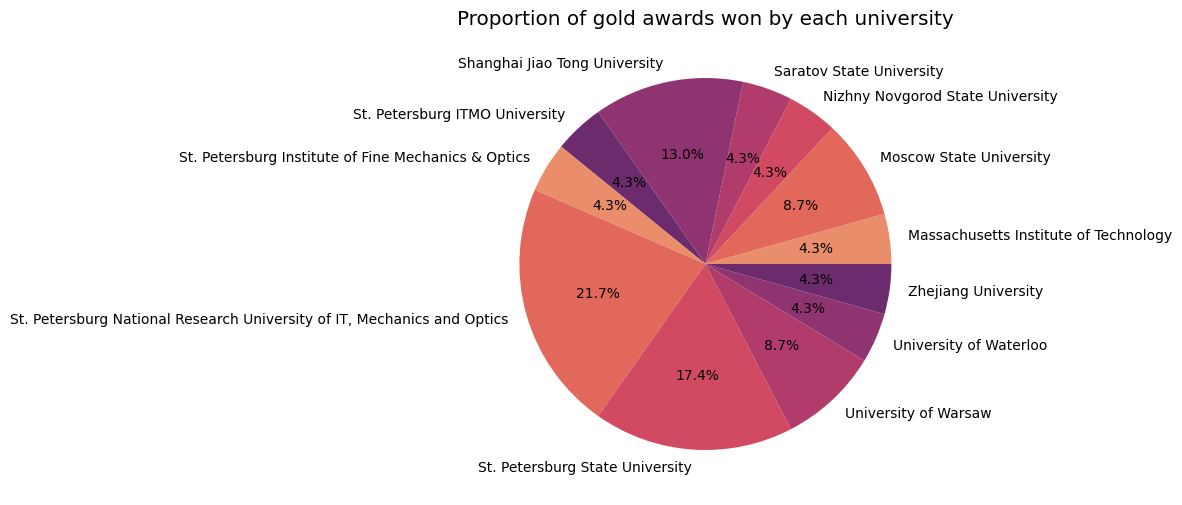

In [11]:
plt.figure(figsize=(6, 6))
plt.title('Proportion of gold awards won by each university')
plt.axis('equal')
plt.pie(list(univ_champs.values()), labels=list(univ_champs.keys()), autopct='%1.1f%%', colors=colors)
plt.show()

*ST.Petersburg National Research Universoty is the most university to win the competition with `5` times and the proportion is 21.7%*
***

#### 4.3 Which country has won the most gold awards?

<Axes: title={'center': 'Frequency of gold awards won by each country'}, xlabel='Count', ylabel='Country'>

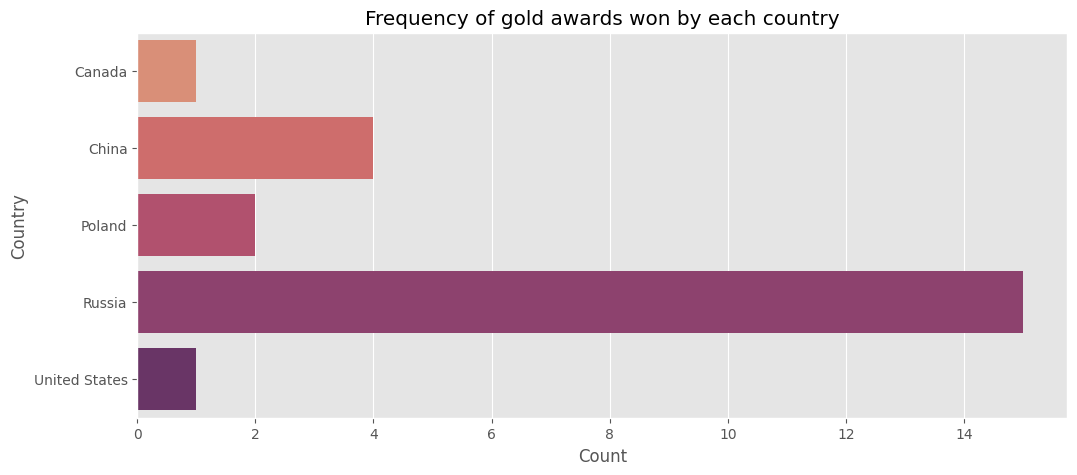

In [12]:
country_champs = world_champs.groupby('Country').size().to_dict()
plt.figure(figsize=(12,5))
plt.title('Frequency of gold awards won by each country')
plt.ylabel('Country')
plt.xlabel('Count')
sns.barplot(y=list(country_champs.keys()), x=list(country_champs.values()),orient='h', palette='flare')

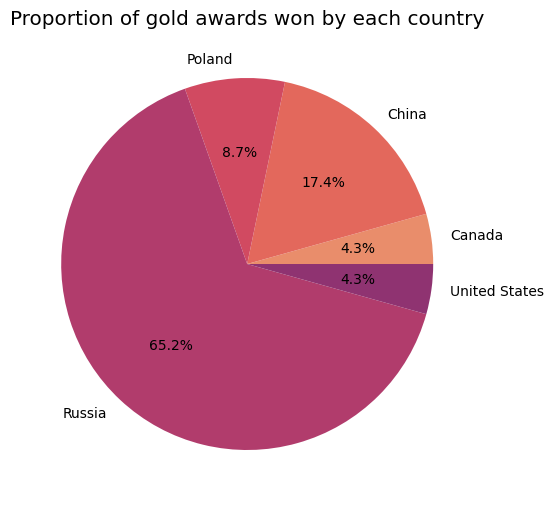

In [13]:
plt.figure(figsize=(6, 6))
plt.title('Proportion of gold awards won by each country')
plt.axis('equal')
plt.pie(list(country_champs.values()), labels=list(country_champs.keys()), autopct='%1.1f%%', colors=colors)
plt.show()


*Russia is the most country to win the competition with 15 times and the proportion is 65.2%*
***

#### 4.4 Which university has the most attendance?

<Axes: title={'center': 'Most Participating Universities'}, xlabel='Count', ylabel='University'>

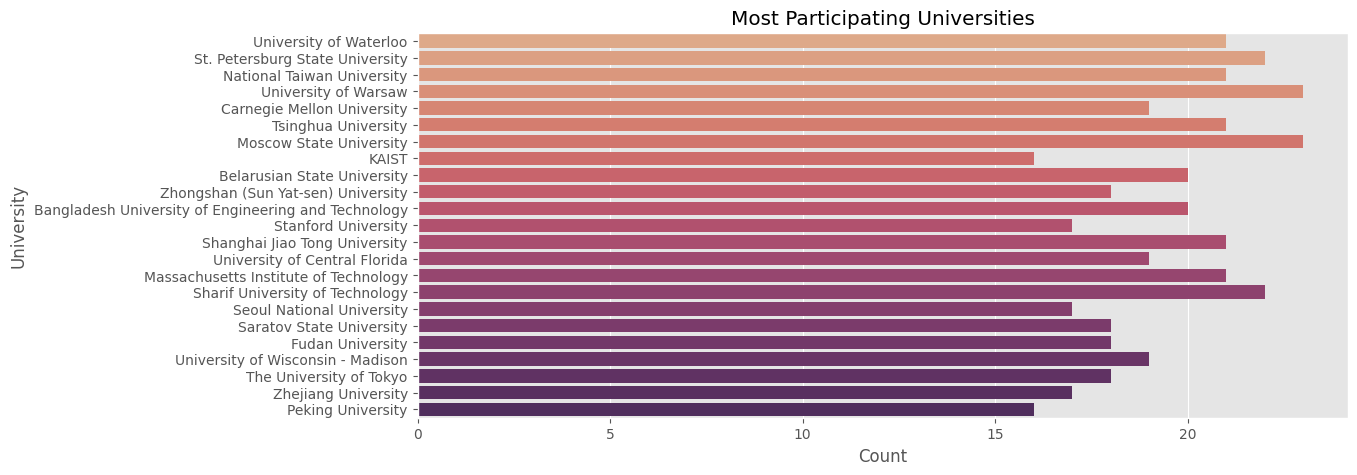

In [14]:
world_parti = df[df['Score'] >= 0]
univ_parti = Counter(world_parti['University'])
most_parti = {k: v for k, v in univ_parti.items() if v > 15}
plt.figure(figsize=(12,5))
plt.title('Most Participating Universities')
plt.ylabel('University')
plt.xlabel('Count')
sns.barplot(y=list(most_parti.keys()), x=list(most_parti.values()),orient='h', palette='flare')

*Most participated universities are University of Warsaw and Moscow State University with 23 times.*
***

#### 4.5 Which team played the most times?

<Axes: title={'center': 'Most Participating Teams'}, xlabel='Count', ylabel='Team'>

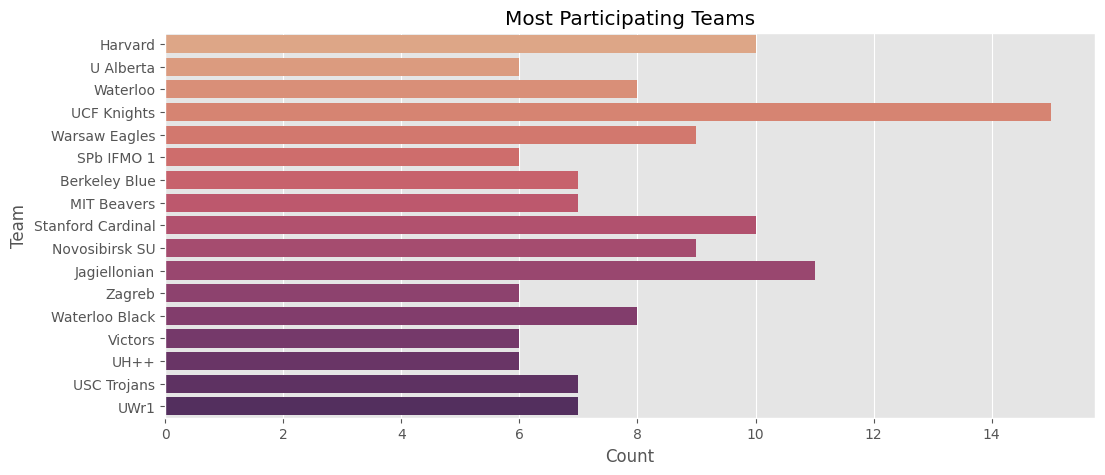

In [15]:
world_parti = df[df['Score'] >= 0]
team_parti = Counter(world_parti['Team'])
most_parti = {k: v for k, v in team_parti.items() if v > 5}
plt.figure(figsize=(12,5))
plt.title('Most Participating Teams')
plt.ylabel('Team')
plt.xlabel('Count')
sns.barplot(y=list(most_parti.keys()), x=list(most_parti.values()),orient='h', palette='flare')

In [16]:
teamAndGold = df[(df['Team'] == 'UCF Knights') & (df['Gold'] == True)]
print(teamAndGold)

Empty DataFrame
Columns: [Year, Date, Host, City, Venue, Rank, University, Country, Team, Contestant 1, Contestant 2, Contestant 3, Gold, Silver, Bronze, Honorable, Score, Total, Score Percentage, Penalty, Prize]
Index: []

[0 rows x 21 columns]


*Most participated team is UCF Knights with 15 times.*
***

#### 4.6 Is there a relation between the number of participating teams and the host country or the time the competition is hold?

<Axes: title={'center': 'Number of participating teams per year'}, xlabel='Teams Count', ylabel='Year'>

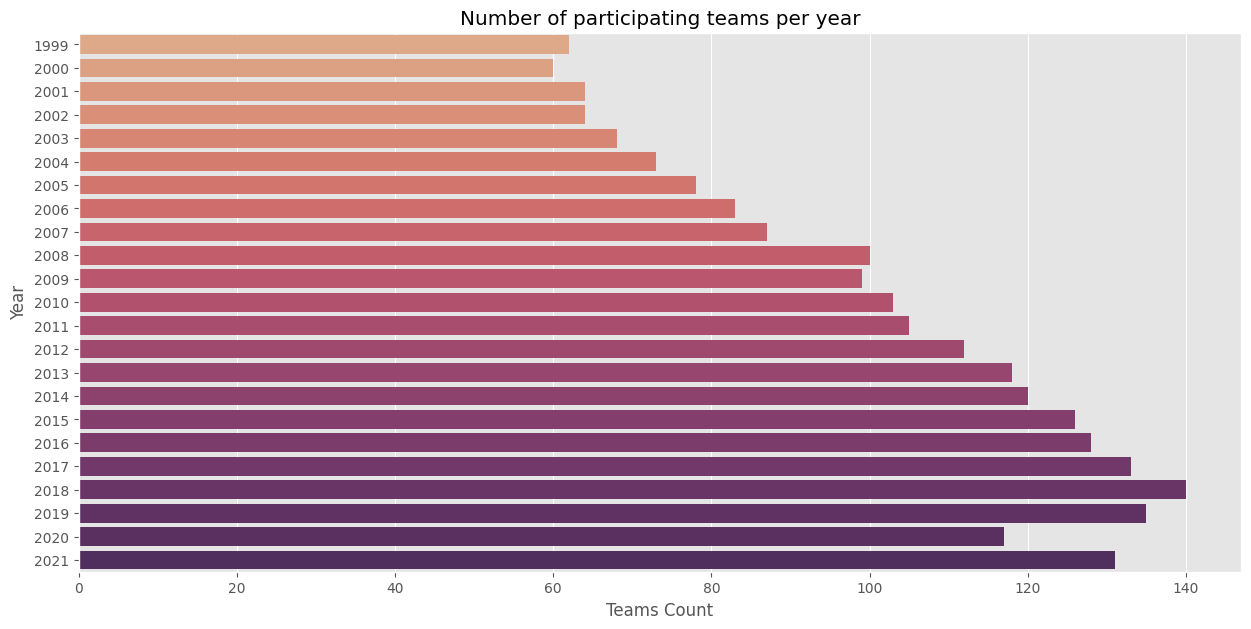

In [17]:
team_year_parti = df.groupby('Year').count()['Team'].to_dict()
plt.figure(figsize=(15,7))
plt.title('Number of participating teams per year')
plt.ylabel('Year')
plt.xlabel('Teams Count')
sns.barplot(y=list(team_year_parti.keys()), x=list(team_year_parti.values()),orient='h', palette='flare')

<Axes: title={'center': 'Number of Participating Teams Based On Host'}, xlabel='Teams Count', ylabel='Host country'>

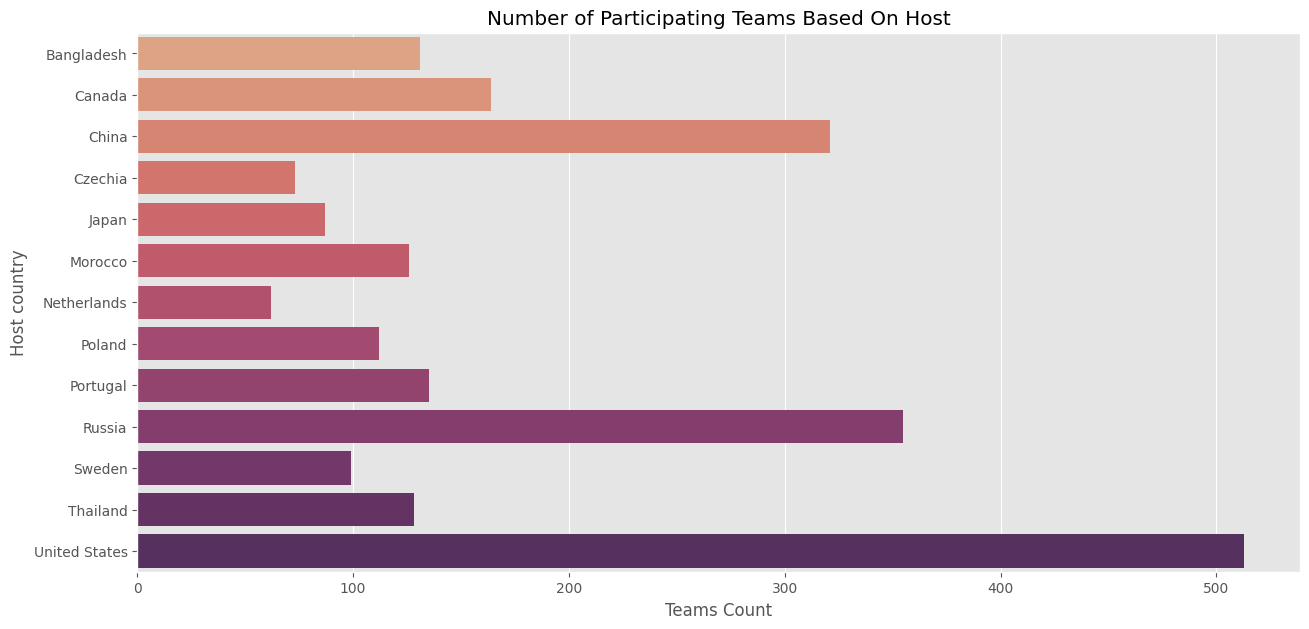

In [18]:
team_host_parti = df.groupby('Host').count()['Team'].to_dict()
plt.figure(figsize=(15,7))
plt.title('Number of Participating Teams Based On Host')
plt.ylabel('Host country')
plt.xlabel('Teams Count')
sns.barplot(y=list(team_host_parti.keys()), x=list(team_host_parti.values()),orient='h', palette='flare')

<Axes: title={'center': 'Total Number of Participating Teams From Countries'}, xlabel='Country', ylabel='Teams Count'>

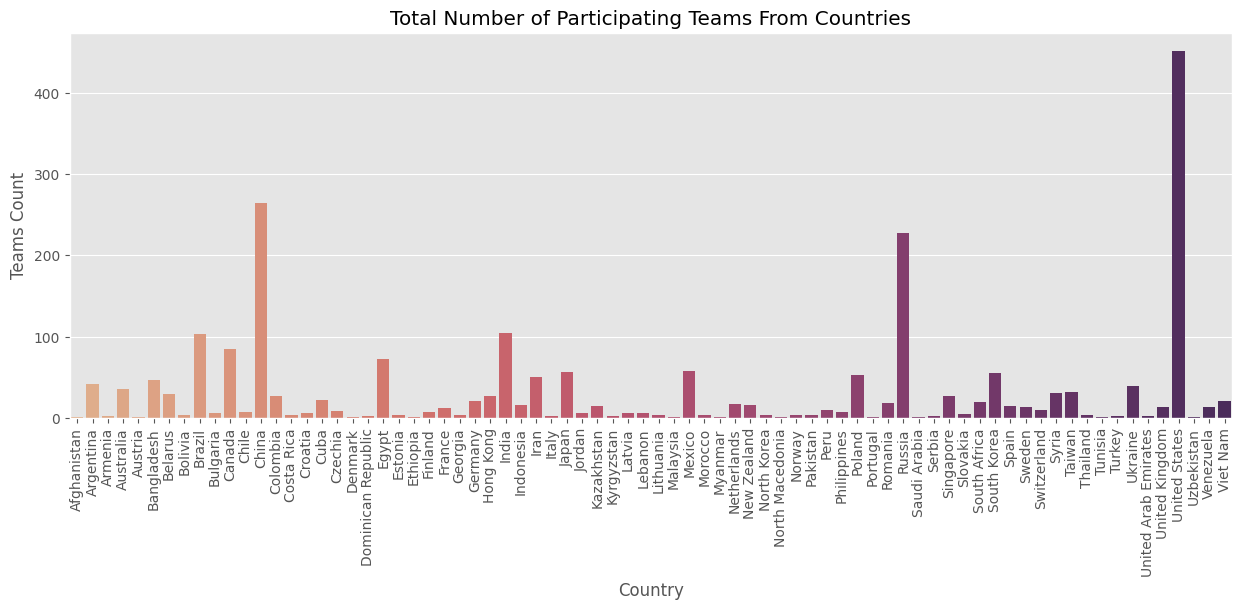

In [19]:
team_country_parti = df.groupby('Country').count()['Team'].to_dict()
fig, ax = plt.subplots(figsize=(15, 5))
ax.tick_params(axis='x', rotation=90)
plt.title('Total Number of Participating Teams From Countries')
plt.xlabel('Country')
plt.ylabel('Teams Count')
sns.barplot(x=list(team_country_parti.keys()), y=list(team_country_parti.values()), palette='flare')

* *In 2018 over 140 team participated the competition and this is the largest number over years.*  
* *USA host has the most number of participating teams with over 500 team.*  
* *USA Teams are the most participating teams in the competition with over 400 team over years.*  
* **There may be a relation between the number of participating teams and the host country or the time the competition is hold.**
***

#### 4.7 Is there a relation between the total number of problems and the score achieved?

Text(13.5, 5.5, 'Best Scores')

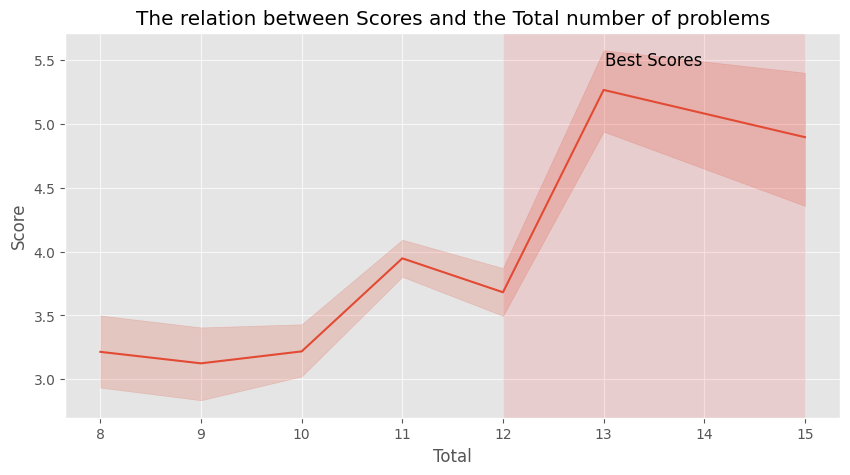

In [20]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.title('The relation between Scores and the Total number of problems')
plt.grid(alpha=0.7)
sns.lineplot(data=df, x="Total", y="Score")
ax.axvspan(12, 15, alpha=0.1, color='red')
ax.text(13.5, 5.5, 'Best Scores', ha='center', va='center', fontsize=12, color='black')

*There may be a relation between Scores and the Total number of problems as from graph best scores are achieved when the total num. of problems is between 12 and 15.*  
***

#### 4.8 Predict which team will be the next gold winner?

In [21]:
df.drop('Year', inplace=True, axis=1)
df['Date'] = pd.to_datetime(df['Date'])
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year
df.drop('Date', inplace=True, axis=1)
df.duplicated().sum()
df.isna().sum()

Host                   0
City                   0
Venue                  0
Rank                  43
University             0
Country                0
Team                   2
Contestant 1         400
Contestant 2         400
Contestant 3         401
Gold                   0
Silver                 0
Bronze                 0
Honorable              0
Score                 33
Total                  0
Score Percentage      33
Penalty              118
Prize               2168
day                    0
month                  0
year                   0
dtype: int64

In [22]:
df.drop(['Contestant 1', 'Contestant 2', 'Contestant 3','Prize'], axis=1, inplace=True)
df.shape
df['Score Percentage'].fillna(0.0, inplace=True)
df['Score'].fillna(0.0, inplace=True)
# df = df.dropna(how='any', axis=1)
df.isna().sum()

Host                  0
City                  0
Venue                 0
Rank                 43
University            0
Country               0
Team                  2
Gold                  0
Silver                0
Bronze                0
Honorable             0
Score                 0
Total                 0
Score Percentage      0
Penalty             118
day                   0
month                 0
year                  0
dtype: int64

In [23]:
binary_cat = ['Gold',
              'Silver',
              'Bronze',
              'Honorable']
for cat in binary_cat:
  df[cat]=df[cat].astype(int)
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series
df = df.apply(lambda x: object_to_int(x))
df.head().T

,0,1,2,3,4
Host,6.00,6.00,6.00,6.00,6.00
City,4.00,4.00,4.00,4.00,4.00
Venue,2.00,2.00,2.00,2.00,2.00
Rank,1.00,2.00,3.00,4.00,5.00
University,522.00,8.00,319.00,448.00,74.00
Country,10.00,26.00,54.00,53.00,72.00
Team,1515.00,493.00,1298.00,1607.00,395.00
Gold,1.00,0.00,0.00,0.00,0.00
Silver,0.00,1.00,0.00,0.00,0.00
Bronze,0.00,0.00,1.00,1.00,1.00


In [24]:
X = df.drop('Gold', axis=1)
y = df['Gold']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42) # split data with 65/35 to train data and test data
X_train = X_train.dropna(how='any', axis=1)
X_test = X_test.dropna(how='any', axis=1)
X_train.isna().sum(),X_test.isna().sum()

(Host                0
 City                0
 Venue               0
 University          0
 Country             0
 Team                0
 Silver              0
 Bronze              0
 Honorable           0
 Score               0
 Total               0
 Score Percentage    0
 day                 0
 month               0
 year                0
 dtype: int64,
 Host                0
 City                0
 Venue               0
 University          0
 Country             0
 Team                0
 Silver              0
 Bronze              0
 Honorable           0
 Score               0
 Total               0
 Score Percentage    0
 day                 0
 month               0
 year                0
 dtype: int64)

In [25]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [26]:
y_pred = rf_model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [27]:
rf_model.predict_proba(X_test)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [28]:
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

In [29]:
print("Accuracy:", accuracy)
print("Confusion matrix:",)
print(confusion_mat)

Accuracy: 0.9925742574257426
Confusion matrix:
[[774   1]
 [  5  28]]


*In the end, I used the random forest algorithm to train the model to predict the gold medal. By adjusting the parameters, the accuracy of the final training model reached 99.26%*  
***